# <center> Week - 3 Assignment

<center> DSC-530

<center> Kalyan Pothineni


In [16]:
# Retrieve the file from URL, add more files as needed down the line, better to group all the files which are been called

from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz")

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

Downloaded 2002FemResp.dct
Downloaded 2002FemResp.dat.gz


In [9]:
# Importing the nsfg and loading the data to dataframe preg
import nsfg

# dataframe = preg
preg = nsfg.ReadFemPreg()
preg.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


## Exercises 1-1, 1-2

In [11]:
# select attribute birthord and creating a birth_order variable and print value counts

birth_order = preg.birthord.value_counts().sort_index()
birth_order

1.0     4413
2.0     2874
3.0     1234
4.0      421
5.0      126
6.0       50
7.0       20
8.0        7
9.0        2
10.0       1
Name: birthord, dtype: int64

In [12]:
# Count number of null values in birthorder

nulls_birth_order = preg.birthord.isnull().sum()
nulls_birth_order

4445

In [13]:
# Select attribute prglngth and creating a prg_length variable and print value counts

prg_length = preg.prglngth.value_counts().sort_index()
prg_length

0       15
1        9
2       78
3      151
4      412
5      181
6      543
7      175
8      409
9      594
10     137
11     202
12     170
13     446
14      29
15      39
16      44
17     253
18      17
19      34
20      18
21      37
22     147
23      12
24      31
25      15
26     117
27       8
28      38
29      23
30     198
31      29
32     122
33      50
34      60
35     357
36     329
37     457
38     609
39    4744
40    1120
41     591
42     328
43     148
44      46
45      10
46       1
47       1
48       7
50       2
Name: prglngth, dtype: int64

In [14]:
# Create new attribute (totalwgt_kg) and add it to the preg dataframe, by converting it to Kg's
totalwgt_kg = preg.totalwgt_lb / 2.2
preg['totalwgt_kg'] = totalwgt_kg

#Calculate the mean of of totalwgt in kg's
ttl_wgt_mean = preg.totalwgt_kg.mean()
print('Mean of Totalwgt:', ttl_wgt_mean)

Mean of Totalwgt: 3.302558389828803


In [17]:
# New dataframe for female respondent data
resp = nsfg.ReadFemResp()
resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


In [19]:
# Select attribute age_r and creating a birth_order variable and print value counts
age_r = resp.age_r.value_counts().sort_index()
age_r

15    217
16    223
17    234
18    235
19    241
20    258
21    267
22    287
23    282
24    269
25    267
26    260
27    255
28    252
29    262
30    292
31    278
32    273
33    257
34    255
35    262
36    266
37    271
38    256
39    215
40    256
41    250
42    215
43    253
44    235
Name: age_r, dtype: int64

In [20]:
# Check how old is the respondent where caseid = 1

age = resp[resp.caseid==1].age_r
print('Age:', age)

Age: 1069    44
Name: age_r, dtype: int64


In [21]:
# Check the pregnancy length of respondent with caseid = 2298
length = preg[preg.caseid==2298].prglngth
print('Pregnancy Length:', length)

Pregnancy Length: 2610    40
2611    36
2612    30
2613    40
Name: prglngth, dtype: int64


In [22]:
# Finding the birthweight of the first baby born to the respondent with caseid = 5012
birth_weight = preg.loc[preg.caseid == 5012, 'birthwgt_lb'].values[0]
print('Birth weight of first baby of respondent with caseid = 5012:', birth_weight)

Birth weight of first baby of respondent with caseid = 5012: 6.0


## Exercises 2-1

In [45]:
# Import the thinkstats2 and thinkplot libraries
import thinkstats2
import thinkplot

In [46]:
# load the preganancy file data into a data frame
preg = nsfg.ReadFemPreg()

#creating dataframe live from preg with only pregnancies with live birth outcome
live = preg[preg.outcome == 1]

In [81]:
# selecting first and other babies using bithord
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

# Variables
first_baby_preg_leng = firsts.prglngth
other_baby_preg_leng = others.prglngth

first_hist = thinkstats2.Hist(firsts.prglngth, label='first')
other_hist = thinkstats2.Hist(others.prglngth, label='other')

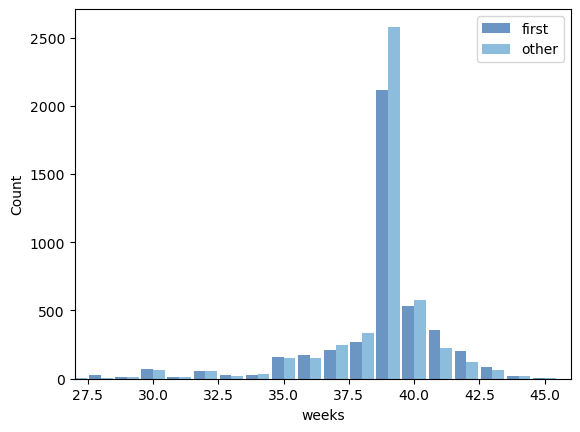

In [82]:
# Histogram of preganancy lenth for the two groups (First babies and others)

width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count', xlim=[27, 46])

In [83]:
# Sumamry statistices

mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()

#print the output
print('Mean of Pregancy length:', mean)
print('Standard Deviation:', std)

Mean of Pregancy length: 38.56055968517709
Standard Deviation: 2.702343810070593


In [84]:
#print the output
mean_first_baby_pregnant_leng = first_baby_preg_leng.mean()
mean_other_baby_pregnant_leng = other_baby_preg_leng.mean()

print('Mean of First preganancy length:', mean_first_baby_pregnant_leng)
print('Mean of other preganancy length:', mean_other_baby_pregnant_leng)

Mean of First preganancy length: 38.60095173351461
Mean of other preganancy length: 38.52291446673706


In [85]:
# Difference in weeks

diff_in_weeks = mean_first_baby_pregnant_leng - mean_other_baby_pregnant_leng
print('Difference in Weeks:', diff_in_weeks)

Difference in Weeks: 0.07803726677754952


In [87]:
# Compute Cohen's d
l1 = len(first_baby_preg_leng)
l2 = len(other_baby_preg_leng)

pooled_std = np.sqrt(((l1 - 1) * std_first_baby_weight ** 2 + (l2 - 1) * std_other_baby_weight ** 2) / (l1 + l2 - 2))

cohen_d_len = (mean_first_baby_pregnant_leng - mean_other_baby_pregnant_leng) / pooled_std

print("Cohen's d for pregnancy length:", cohen_d_len)


Cohen's d for pregnancy length: 0.055470454445205125


### Do First babies arrive late?

Summary statistics that would be useful for a news story on the evening news regarding the arrival of first babies late could include the mean, standard deviation, and maximum value of the pregnancy length for first-time mothers. These statistics would provide a general overview of the average and range of late arrivals, creating a narrative around the potential delay in first births.

On the other hand, if the goal is to reassure an anxious patient, it would be more appropriate to focus on the median and interquartile range (IQR). The median represents the middle value of the pregnancy length, less influenced by extreme values. The IQR measures the spread within the middle 50% of the data, giving a sense of the typical range of pregnancy durations for first-time mothers.

As Cecil Adams, author of The Straight Dope, the question "Do first arrivals arrive late?" can be answered based on the results in this chapter. The analysis of pregnancy lengths for first-time mothers indicates that, on average, they tend to have a slightly longer pregnancy than experienced mothers. The mean pregnancy length for first babies is approximately 0.078 weeks longer. However, it is essential to note that the difference in pregnancy length is relatively small. While there is some variation, the median pregnancy length for first babies is not significantly different from that for experienced mothers. Therefore, while there may be a slight tendency for first arrivals to arrive later, it is not a consistent or significant trend.

## Exercises 2-4

In [73]:
import matplotlib.pyplot as plt

# Variables
first_baby_weights = firsts.totalwgt_lb
other_baby_weights = others.totalwgt_lb

In [71]:
# Check if the first babies are lighter or heavier checking the mean of total witght in lb's
mean_first_baby_weight = np.mean(first_baby_weights)
mean_other_baby_weight = np.mean(other_baby_weights)

print('First babies mean weight:', mean_first_baby_weight)
print('Other babies mean weight:', mean_other_baby_weight)

First babies mean weight: 7.201094430437772
Other babies mean weight: 7.325855614973262


In [72]:
# Check if the first babies are lighter or heavier checking the standard deviation of total witght in lb's
std_first_baby_weight = np.std(first_baby_weights)
std_other_baby_weight = np.std(other_baby_weights)

print('First babies standard Deviation:', std_first_baby_weight)
print('Other babies standard Deviation:', std_other_baby_weight)

First babies standard Deviation: 1.4204100706744494
Other babies standard Deviation: 1.3940463564239292


In [69]:
# Compute Cohen's d
n1 = len(first_baby_weights)
n2 = len(other_baby_weights)

pooled_std = np.sqrt(((n1 - 1) * std_first_baby_weight ** 2 + (n2 - 1) * std_other_baby_weight ** 2) / (n1 + n2 - 2))

cohen_d = (mean_first_baby_weight - mean_other_baby_weight) / pooled_std

print("Cohen's d for birth weight:", cohen_d)


Cohen's d for birth weight: -0.08868275234489272


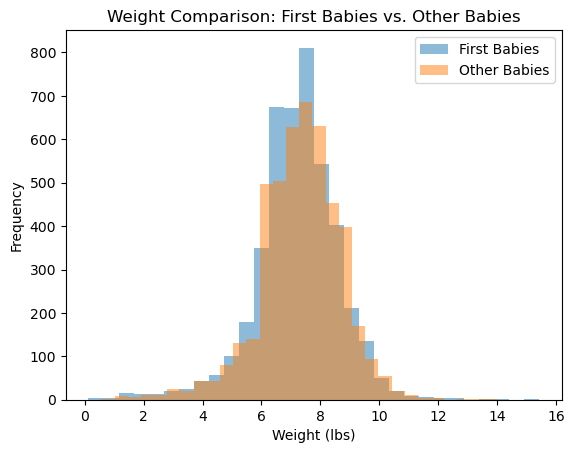

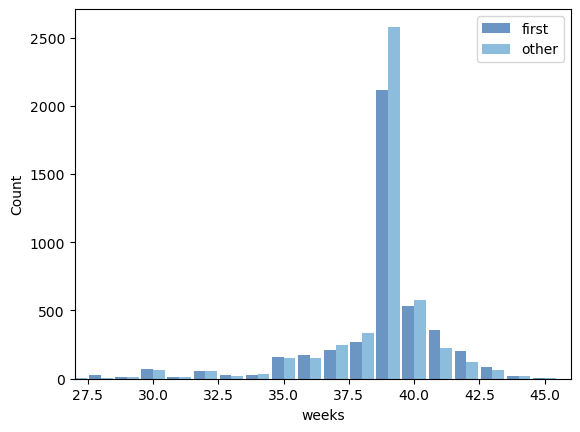

In [77]:
# Histogram to visualize the weight distribution
plt.hist(first_baby_weights, alpha=0.5, bins=30, label='First Babies')
plt.hist(other_baby_weights, alpha=0.5, bins=30, label='Other Babies')
plt.xlabel('Weight (lbs)')
plt.ylabel('Frequency')
plt.title('Weight Comparison: First Babies vs. Other Babies')
plt.legend(loc='upper right')
plt.show()

# Histogram to visualize the pregancy length
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count', xlim=[27, 46])

The Cohen's d values for birth weight and pregnancy length are as follows:

Cohen's d for birth weight: -0.08868275234489272
Cohen's d for pregnancy length: 0.055470454445205125

The negative Cohen's d value for birth weight suggests that, on average, first babies tend to be slightly lighter than other babies, although the effect size is small. The positive Cohen's d value for pregnancy length indicates that, on average, first babies have a slightly longer pregnancy length compared to other babies, again with a small effect size.

Comparing the two Cohen's d values, we can see that the difference in birth weight between first babies and other babies is slightly larger in magnitude (negative) than the difference in pregnancy length (positive). 

However, both effect sizes are small, suggesting that the differences in birth weight and pregnancy length between the groups are relatively minor.